# **Harshitraj Jayaswal**

# **Data Science and Business Analytics Intern at The Spark Foundation**
### GRIPAUGUST2021

## Task 1- Predicting the Percentage of Students based on the no. of study hours




**Importing the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the Data**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Checking if there is any missing values in the Data**

In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

**Checking if there is any outlier in the Data with the help of Boxplot**

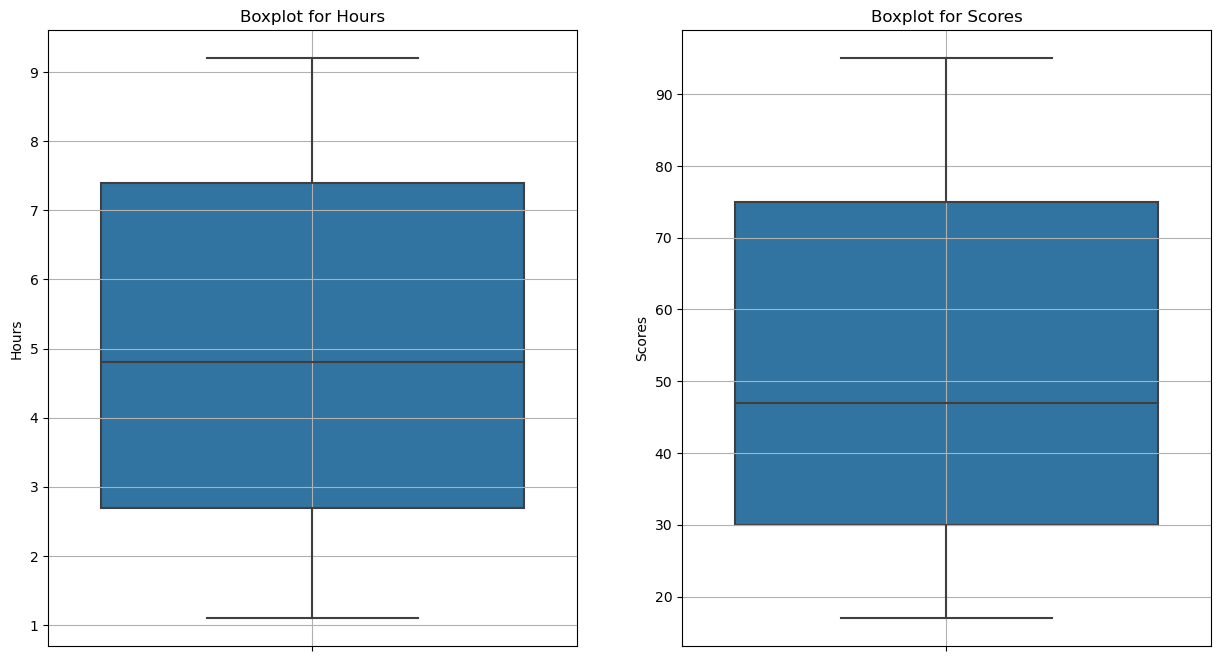

In [4]:
plt.style.use('default')
fig,axes=plt.subplots(1,2,figsize=(15,8))
sns.boxplot(ax=axes[0],y='Hours',data=df)
sns.boxplot(ax=axes[1],y='Scores',data=df)
axes[0].grid()
axes[1].grid()
axes[0].set_title('Boxplot for Hours')
axes[1].set_title('Boxplot for Scores')
plt.show()

**Analysing the relationship between Scores and Hours using Scatter plot**

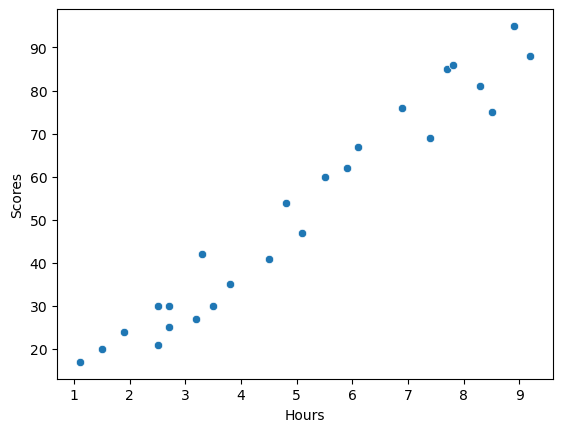

In [5]:
sns.scatterplot(x='Hours',y='Scores',data=df)
plt.show()

**Preparing the data for Training the dataset**

In [6]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values
print(x)
print(y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


**Spliting the Data into testing and training sets**

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Training the Data**

In [8]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

**Analysing the regression line got from training the data with the Original data**

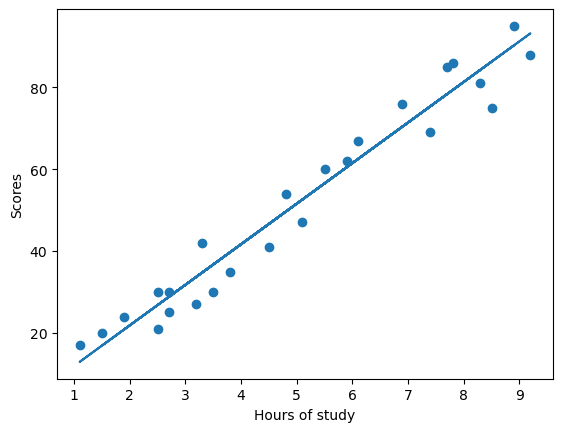

In [9]:
m=regressor.coef_
c=regressor.intercept_
line=(m*x)+c

plt.scatter(x,y)
plt.plot(x,line)
plt.xlabel('Hours of study')
plt.ylabel('Scores')
plt.show()

**Comparing the predicted data and the actual data from test set** 

In [10]:
y_pred=regressor.predict(x_test)
compare=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Evaluating the model with the help of r2 score(Coefficient of Determination)**

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9454906892105356

**Predcting the score if the student studies for 9.25 hours**

In [12]:
final_answer=regressor.predict([[9.25]])
print('If a student studies for 9.25 hours so according to the given data the score will be:',final_answer[0].round(2))

If a student studies for 9.25 hours so according to the given data the score will be: 93.69
